# Flask Assignment - 2


### Q1. Explain GET and POST methods.

**GET Method:**

- **Purpose:**
  - The GET method is used to request data from a specified resource. It is a safe and idempotent method, meaning that it should not have any side effects on the server, and multiple identical requests should produce the same result.

- **Data in URL:**
  - Data is appended to the URL in the form of query parameters. For example, `https://example.com/resource?param1=value1&param2=value2`.

- **Visibility:**
  - Parameters are visible in the URL, making it suitable for relatively small amounts of data.

- **Caching:**
  - GET requests can be cached, and browsers may cache the results to improve performance.

- **Idempotent:**
  - Repeating a GET request should have the same effect as a single request. It doesn't change the state on the server.

- **Security:**
  - It's not suitable for sensitive data or situations where data should not be exposed in the URL.

**POST Method:**

- **Purpose:**
  - The POST method is used to submit data to be processed to a specified resource. It is not idempotent, and it can have side effects on the server (e.g., updating a database or creating a new resource).

- **Data in Request Body:**
  - Data is sent in the request body, not in the URL. This allows for larger amounts of data compared to the GET method.

- **Visibility:**
  - Data is not visible in the URL, making it suitable for sensitive information or larger data payloads.

- **Caching:**
  - POST requests are typically not cached. Each request is considered independent.

- **Idempotent:**
  - Repeating a POST request may result in different outcomes on the server, especially if it involves creating new resources or updating data.

- **Security:**
  - Suitable for sensitive data as the data is not exposed in the URL. It provides a more secure way to transmit information.


### Q2. Why is request used in Flask?

In Flask, the `request` object is used to access incoming request data. It provides a convenient way to interact with the data submitted by a client as part of an HTTP request. The `request` object allows you to retrieve form data, query parameters, files, and other information sent by the client in the request.

The `request` object is an integral part of handling client input in a Flask application. It simplifies the process of extracting and processing data from incoming requests, allowing developers to build dynamic and interactive web applications.

Key uses of the `request` object in Flask:

1. **Accessing Form Data:**
   - When a user submits a form on a web page, the form data is sent as part of the HTTP request. The `request` object allows you to access this form data, making it easy to process user inputs.


In [1]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/submit', methods=['POST'])
def submit_form():
    username = request.form.get('username')
    password = request.form.get('password')
    # Process form data


2. **Query Parameters:**
   - When parameters are included in the URL (e.g., `http://example.com/search?query=flask`), the `request` object allows you to access these query parameters.


In [2]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/search')
def search():
    query = request.args.get('query')
    # Process query parameter


3. **File Uploads:**
   - If a form includes file uploads, the `request` object can be used to access the uploaded files.


In [3]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/upload', methods=['POST'])
def upload_file():
    file = request.files['file']
    # Process the uploaded file


4. **HTTP Methods:**
   - The `request` object provides information about the HTTP method used in the request (e.g., GET, POST). This allows you to conditionally handle different types of requests.


In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/process', methods=['POST'])
def process_post_request():
    # Handle POST request

5. **Accessing Headers:**
   - The `request` object allows you to access HTTP headers sent by the client.


In [5]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/headers')
def view_headers():
    user_agent = request.headers.get('User-Agent')
    # Process user agent information


6. **Cookies:**
   - You can use the `request` object to access cookies sent by the client.


In [6]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/get_cookie')
def get_cookie():
    cookie_value = request.cookies.get('cookie_name')
    # Process the cookie value


### Q3. Why is redirect() used in Flask?

In Flask, the `redirect()` function is used to perform a redirect to a different endpoint (URL) within the same application. It is particularly useful when you want to redirect a user to another page after they have submitted a form, logged in, or performed some other action. The `redirect()` function helps in managing the flow of the application and navigating users to different parts of the web application.

The `redirect()` in Flask is a powerful tool for managing the flow and navigation of a web application. It allows developers to guide users to different parts of the application, handle form submissions, and ensure a smooth and dynamic user experience.

**Key purposes and use cases of `redirect()` in Flask:**

1. **Post-Form Submission Redirect:**
   - After a user submits a form, it's common to redirect them to a different page to show a success message or to a page where they can view the submitted data.



In [7]:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

@app.route('/submit_form', methods=['POST'])
def submit_form():
    # Process form data
    # Redirect to a different page after form submission
    return redirect(url_for('success_page'))


2. **Dynamic URL Building:**
   - The `redirect()` function is often used in conjunction with `url_for()` to dynamically build URLs. This is useful for maintaining flexibility and avoiding hardcoding URLs in the application.


In [8]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/dashboard')
def dashboard():
    # Check if user is logged in
    if user_is_logged_in():
        return redirect(url_for('user_dashboard'))
    else:
        return redirect(url_for('login'))


3. **Changing URL Structure:**
   - When you want to change the structure of your URLs or update the routing logic, using `redirect()` ensures that existing links or bookmarks pointing to the old URLs are automatically redirected to the new ones.


In [9]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/old_url')
def old_url():
    # Redirect to a new URL
    return redirect(url_for('new_url'))


4. **Error Handling and Redirection:**
   - The `redirect()` function can be used for error handling by redirecting users to custom error pages or providing feedback.


In [10]:
from flask import Flask, redirect, url_for, abort

app = Flask(__name__)

@app.route('/protected')
def protected_resource():
    # Check if user is authorized
    if not user_is_authorized():
        # Redirect to the login page if not authorized
        return redirect(url_for('login'))
    else:
        # Show protected resource
        return 'Protected Resource'


5. **External Redirects:**
   - While `redirect()` is typically used for internal redirects within the same Flask application, it can also be used for external redirects to URLs outside the application.


In [11]:
from flask import Flask, redirect

app = Flask(__name__)

@app.route('/external_link')
def external_link():
    # Redirect to an external URL
    return redirect('https://example.com')


### Q4. What are templates in Flask? Why is the render_template() function used?

**Templates in Flask:**

In Flask, templates are used to generate dynamic HTML content by combining HTML structure with placeholders for dynamic data. Templates allow developers to separate the presentation logic from the application logic, promoting a cleaner and more maintainable code structure. Flask uses the Jinja2 templating engine, which is a powerful and feature-rich template engine for Python.


**`render_template()` Function:**

The `render_template()` function in Flask is used to render HTML templates and pass dynamic data to them. It takes the name of the template file as its first argument and additional keyword arguments for the dynamic data to be inserted into the template. The template files are typically stored in a folder named "templates" in the project directory.

**Example:**


In [12]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    username = 'John'
    return render_template('index.html', username=username)



#### Why `render_template()` is Used:

1. **Separation of Concerns:**
   - `render_template()` allows developers to separate the application logic from the presentation logic. This separation promotes code organization and maintainability.

2. **Dynamic Content:**
   - Templates are designed to handle dynamic content, and `render_template()` provides a convenient way to pass dynamic data from the Python code to the HTML templates.

3. **Template Inheritance:**
   - The `render_template()` function supports template inheritance, allowing the use of base templates and extending them in child templates.

4. **Code Reusability:**
   - Templates and the `render_template()` function promote code reusability. Common structures can be defined in base templates, and dynamic content can be injected as needed.

5. **Jinja2 Integration:**
   - `render_template()` integrates seamlessly with the Jinja2 templating engine, providing powerful features such as template inheritance, filters, and control structures.

By using `render_template()`, Flask applications can generate dynamic and context-aware HTML content, providing a flexible and maintainable way to build web interfaces.

### Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

In [13]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/greet", methods=['GET'])
def hello_world():
    return jsonify(message="Hello Everyone! This is Ali Abbas. I live in New Delhi. How are you all doing?")

if __name__=="__main__":
    app.run(host="0.0.0.0")


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.155.52:5000
Press CTRL+C to quit
192.168.155.52 - - [06/Dec/2023 16:16:00] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:02] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:02] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:02] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:03] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:08] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:08] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:08] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:09] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:09] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:09] "GET /greet HTTP/1.1" 200 -
192.168.155.52 - - [06/Dec/2023 16:16:19] "GET /greet HTTP/1.1" 200 -


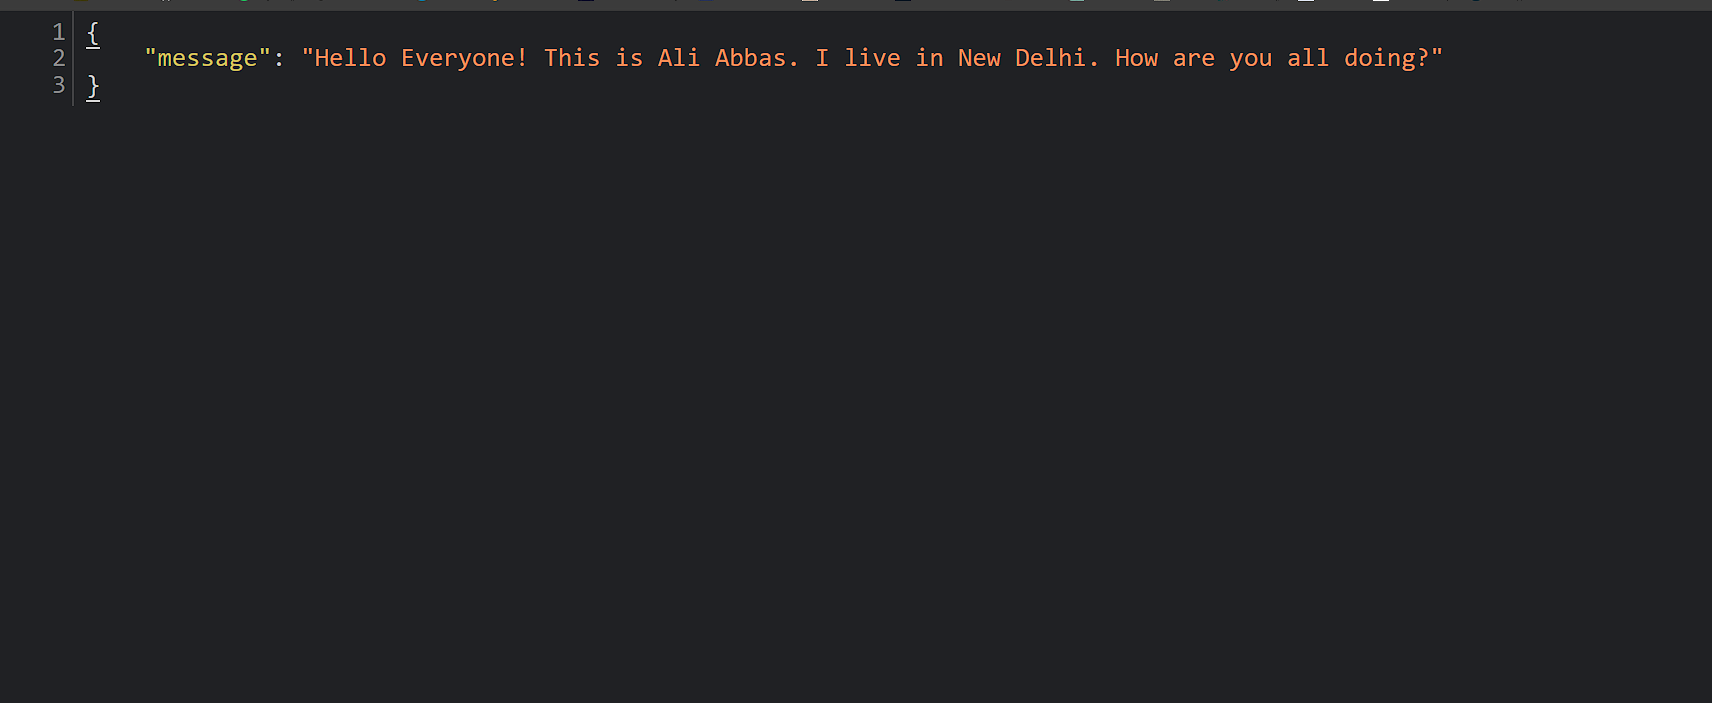

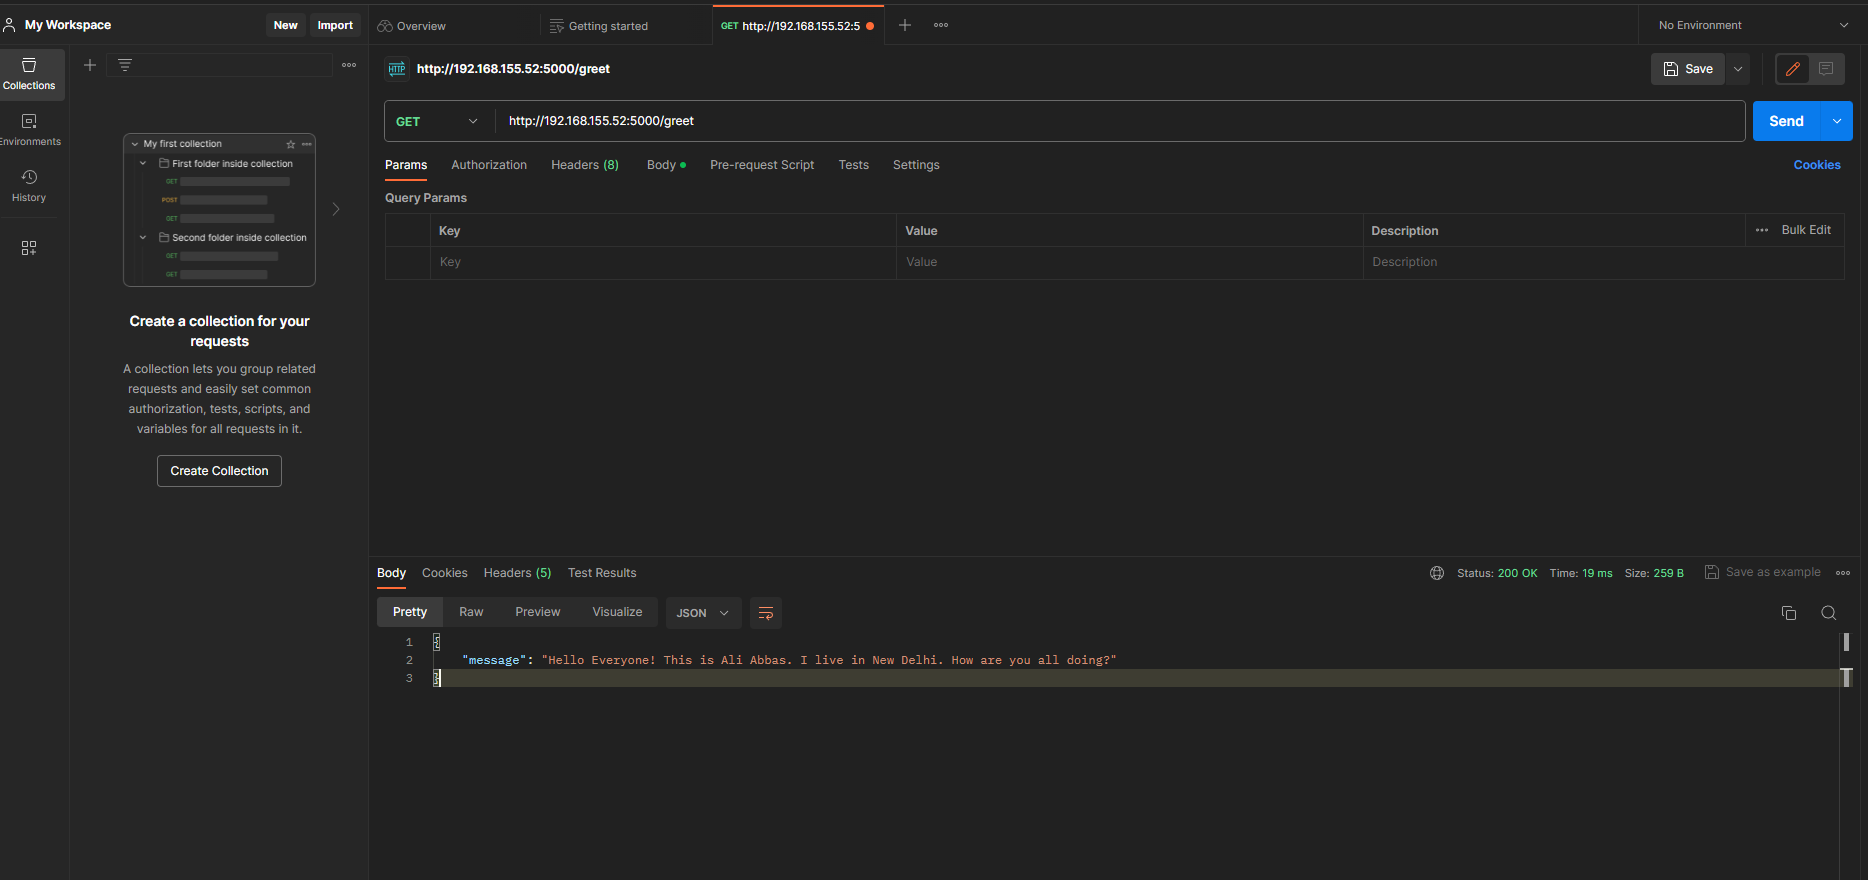